## **Importing Libraries and Reading Dataset**

In [320]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv("train.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")

In [321]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

## **Understanding the various features (columns) of the dataset:**

In [322]:
# Get the unique values and their frequency of variable Property_Area

df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

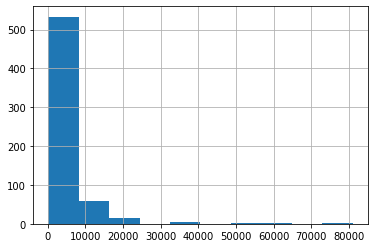

In [323]:
# Box Plot for understanding the distributions and to observe the outliers.

%matplotlib inline

# Histogram of variable ApplicantIncome

df['ApplicantIncome'].hist()

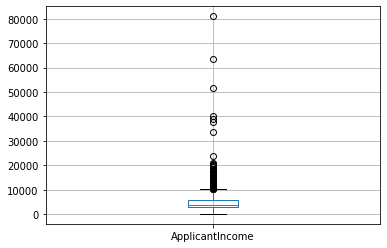

In [324]:
# Box Plot for variable ApplicantIncome of training data set

df.boxplot(column='ApplicantIncome')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


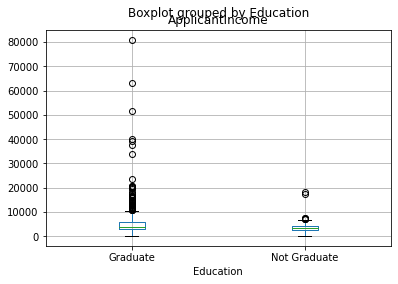

In [325]:
# Box Plot for variable ApplicantIncome by variable Education of training data set

df.boxplot(column='ApplicantIncome', by = 'Education')

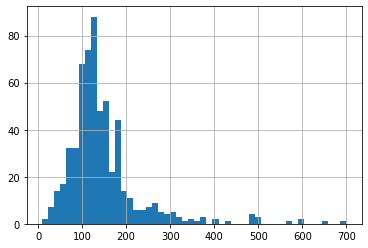

In [326]:
# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)

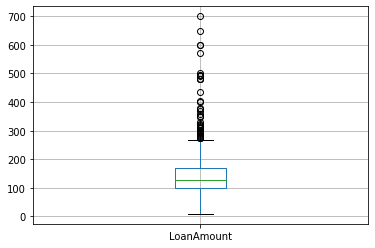

In [327]:
# Box Plot for variable LoanAmount of training data set

df.boxplot(column='LoanAmount')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


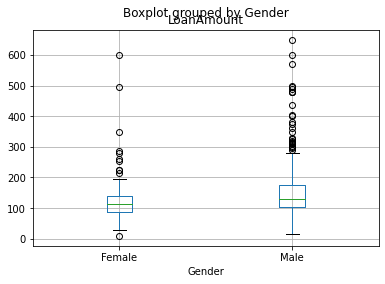

In [328]:
# Box Plot for variable LoanAmount by variable Gender of training data set

df.boxplot(column='LoanAmount', by = 'Gender')

## **Understanding Distribution of Categorical Variables:**

In [329]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

422


In [330]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [331]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
    return ser/float(ser[-1])

# Loan approval rate for customers having Credit_History (1)
df=pd.crosstab(df ["Credit_History"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Credit_1 = df['Y'][1]
print(loan_approval_with_Credit_1*100)

79.57894736842105


In [332]:
df['Y']

Credit_History
0.0    0.078652
1.0    0.795789
All    0.682624
Name: Y, dtype: float64

In [333]:
# Replace missing value of Self_Employed with more frequent category

# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv("train.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")
df['Self_Employed'].fillna('No',inplace=True)

## **Outliers of LoanAmount and Applicant Income:**

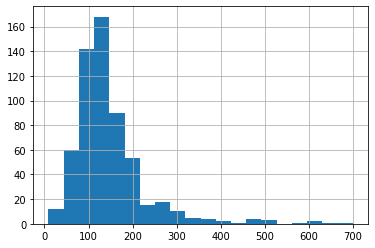

In [334]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df['LoanAmount'].hist(bins=20)

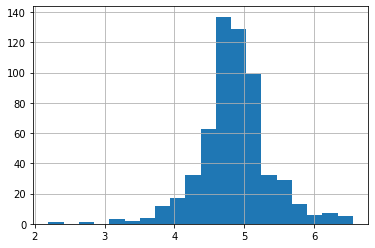

In [335]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

## **Data Preparation for Model Building:**

In [336]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Impute missing values for Education
df['Education'].fillna(df['Education'].mode()[0],inplace=True)

# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

## **Generic Classification Function:**

In [362]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.model_selection import KFold

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split():
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

## **Model Building:**

In [363]:
#Combining both train and test dataset

#Create a flag for Train and Test Data set
df['Type']='Train' 
test['Type']='Test'
fullData = pd.concat([df,test],axis=0, sort=True)

#Look at the available missing values in the dataset
fullData.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            10
Education              0
Gender                11
LoanAmount            27
LoanAmount_log       389
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         23
TotalIncome          367
Type                   0
dtype: int64

In [364]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [365]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Education'].fillna(fullData['Education'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

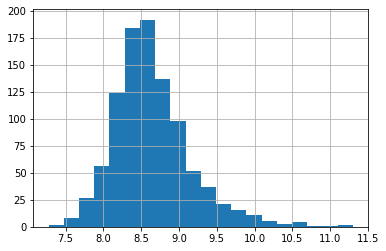

In [366]:
#Create a new column as Total Income

fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20)

In [367]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## **Logistic Regression Model:**

In [368]:
from sklearn.linear_model import LogisticRegression

predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values

In [369]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

outcome_var = 'Loan_Status'
classification_model(model, df,predictors_Logistic,outcome_var)

test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])

Accuracy : 80.945%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


ValueError: ignored